In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("JSON_OUTPUT21.csv")

In [4]:
# df['close'] = [ele[ : -6] for ele in df['close']]

In [5]:
df.drop([index for index, ele in enumerate(df['close']) if ele == ''], inplace = True)

In [6]:
df = df.astype({'close' : float})

In [7]:
df['FAST_EMA'] = df['close'].ewm(span = 20).mean()
df['SLOW_EMA'] = df['close'].ewm(span = 50).mean()

df.head()

,Unnamed: 0,time,open,high,low,close,volume,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,FAST_EMA,SLOW_EMA
0,0,2021-09-21 20:00:00,122.322702,122.322702,122.193835,122.193835,3939,NaN,NaN,NaN,NaN,NaN,NaN,122.193835,122.193835
1,1,2021-09-21 19:30:00,122.295088,122.414751,122.295088,122.414751,313,NaN,NaN,NaN,NaN,NaN,NaN,122.309816,122.306502
2,2,2021-09-21 19:00:00,122.479184,122.598847,122.258269,122.423955,7595,NaN,NaN,NaN,NaN,NaN,NaN,122.351727,122.347229
3,3,2021-09-21 18:30:00,122.368726,123.068292,122.368726,122.451570,18725,NaN,NaN,NaN,NaN,NaN,NaN,122.380550,122.374900
4,4,2021-09-21 17:30:00,122.377931,122.377931,122.295088,122.295088,417,NaN,NaN,NaN,NaN,NaN,NaN,122.359878,122.357636


In [8]:
df.drop(df.columns[[7, 8, 9, 10, 11, 12]], axis = 1, inplace = True)

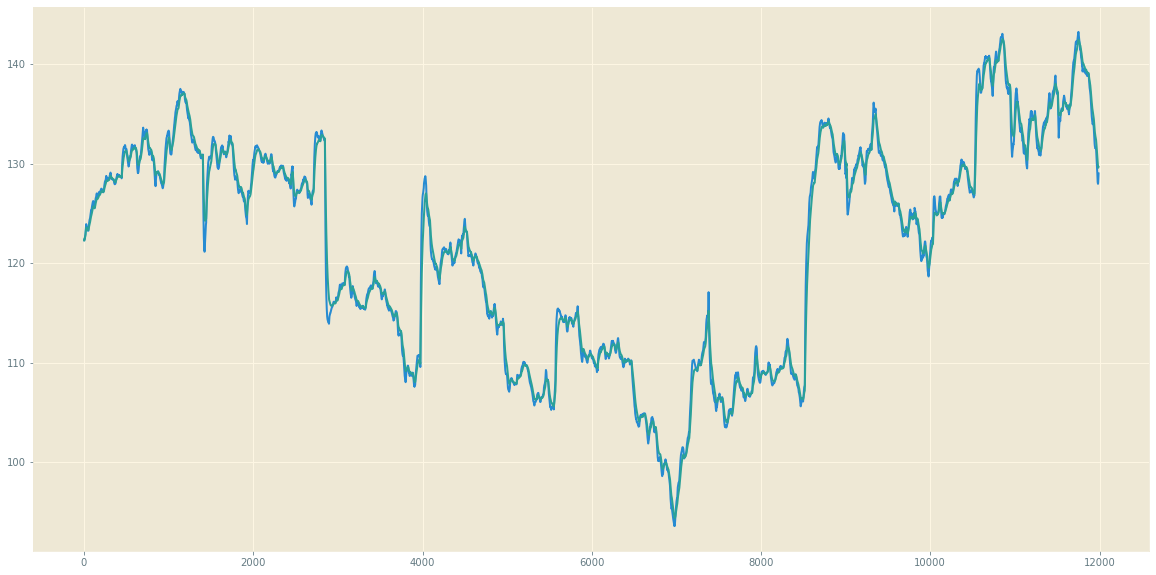

In [9]:
plt.figure(figsize=(20, 10))
plt.style.use('Solarize_Light2')

x = df['Unnamed: 0']
y1 = df['FAST_EMA']
y2 = df['SLOW_EMA']

plt.plot(x, y1, '-')
plt.plot(x, y2, '-')

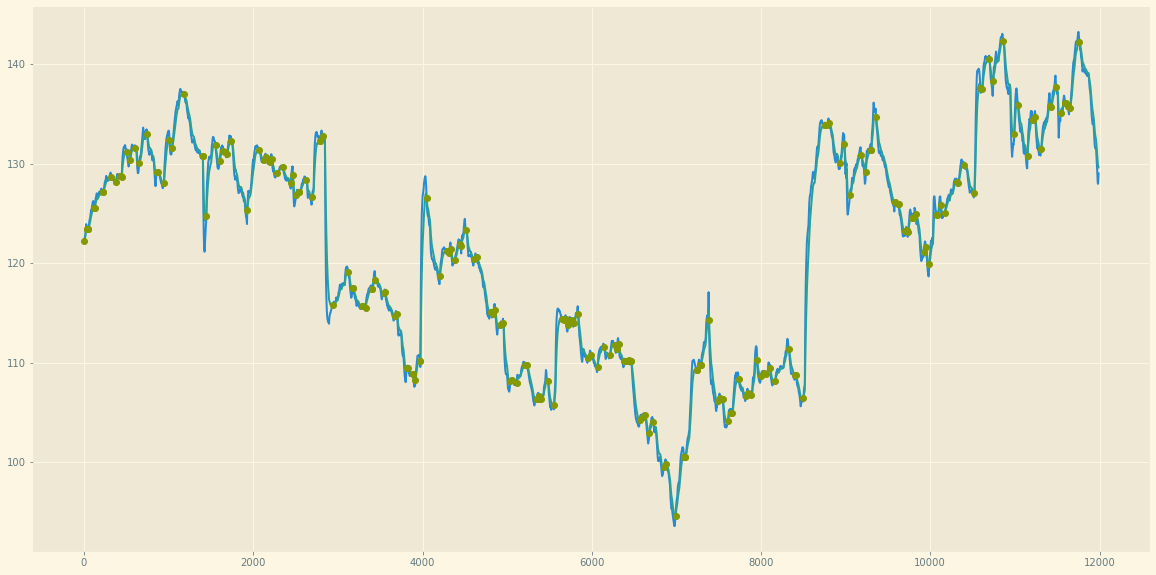

In [10]:
first_line = LineString(np.column_stack((x, y1)))
second_line = LineString(np.column_stack((x, y2)))
intersection = first_line.intersection(second_line)

plt.figure(figsize=(20, 10))

plt.plot(x, y1)
plt.plot(x, y2)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

In [11]:
df.info()
plt.figure(figsize=(150, 150))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11984 entries, 0 to 11983
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11984 non-null  int64  
 1   time        11984 non-null  object 
 2   open        11984 non-null  float64
 3   high        11984 non-null  float64
 4   low         11984 non-null  float64
 5   close       11984 non-null  float64
 6   volume      11984 non-null  int64  
 7   FAST_EMA    11984 non-null  float64
 8   SLOW_EMA    11984 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 936.2+ KB


<Figure size 10800x10800 with 0 Axes>

<Figure size 10800x10800 with 0 Axes>

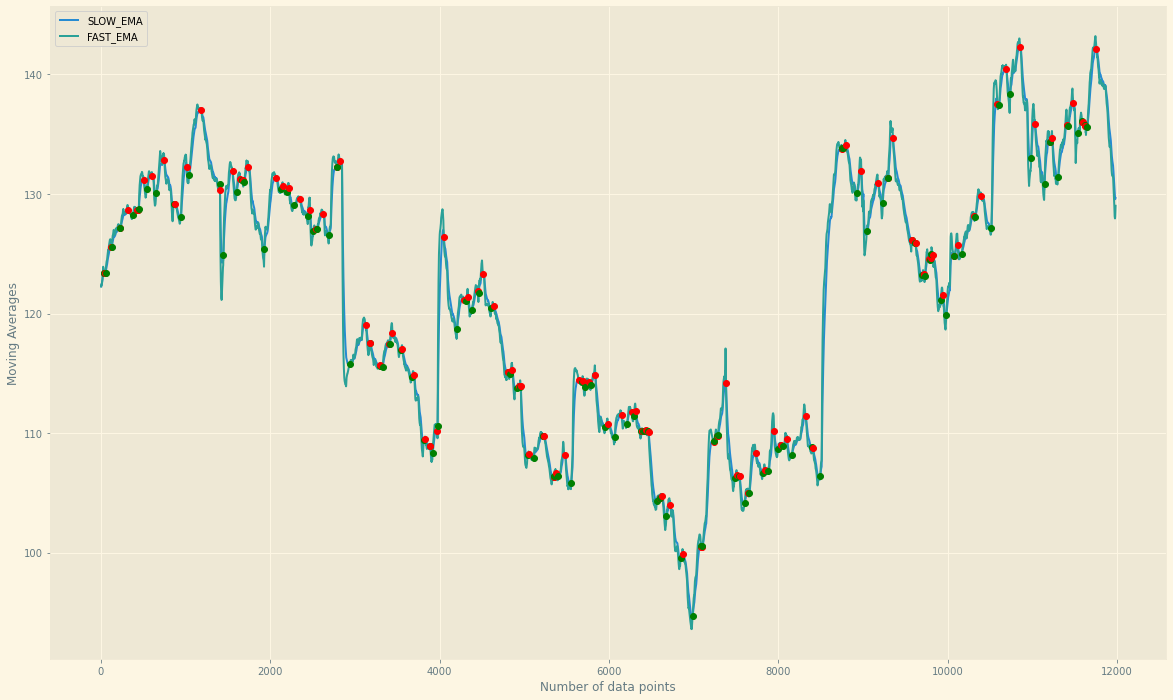

In [12]:
b = True
capital = 10000
indexes = [0]

# lst = [0]*len(df["close"])
lst = []
lst.append(0)

c_PnL = 0

units = 0 # units bought

df[['SLOW_EMA', 'FAST_EMA']].plot(figsize=(20, 12))
plt.xlabel('Number of data points')
plt.ylabel('Moving Averages')
prev = 0
for i in range(1, len(df["close"])):
    current_pnl = 0
    
    # selling condition
    if b and df["SLOW_EMA"][i] > df["FAST_EMA"][i] and df["SLOW_EMA"][i - 1] < df["FAST_EMA"][i - 1]:
        b = False
        c_PnL += (units*df["close"][i] - prev)
        capital = capital + (units*df["close"][i] - prev)
        plt.plot(i,df["SLOW_EMA"][i],'ro') 
        indexes.append(i)
        lst.append(c_PnL)
        

    # buying condition
    elif not b and df["SLOW_EMA"][i] < df["FAST_EMA"][i] and df["SLOW_EMA"][i - 1] > df["FAST_EMA"][i - 1]:
        b = True
        units = (capital//df["close"][i])
        prev = units * df['close'][i]
        plt.plot(i,df["SLOW_EMA"][i], 'go') 
        indexes.append(i)
        lst.append(c_PnL)
    
               


In [13]:
print(lst)

[0, 0.0, 0.0, -96.46639487999892, -96.46639487999892, -28.838665605999267, -28.838665605999267, 64.24035968399949, 64.24035968399949, 124.5962901640014, 124.5962901640014, 57.00611642200238, 57.00611642200238, 22.54331269600334, 22.54331269600334, -115.76394620799692, -115.76394620799692, -85.73671235799702, -85.73671235799702, -57.670777857996654, -57.670777857996654, -139.04612424999686, -139.04612424999686, -1.5323222179958975, -1.5323222179958975, 321.1921977070069, 321.1921977070069, -745.8290574109924, -745.8290574109924, -675.5963671909903, -675.5963671909903, -694.5556036909893, -694.5556036909893, -771.8759964909877, -771.8759964909877, -758.3449277509881, -758.3449277509881, -554.8884643429883, -554.8884643429883, -639.3153218419884, -639.3153218419884, -756.8946902239877, -756.8946902239877, -824.0829007279863, -824.0829007279863, -1218.031109507987, -1218.031109507987, -1288.4997498199864, -1288.4997498199864, -1321.2931288519867, -1321.2931288519867, -1031.7123055719876, -

In [14]:
df.drop(['time', 'open', 'high', 'low', 'volume'], axis = 1, inplace = True)

In [15]:
dict1 = {'close' : [], 'Profit/Loss' : []}
j = 0
for index in indexes:
    dict1['close'].append(df['close'][index])
    
    if j % 2 == 1 and df['close'][indexes[j]] > df['close'][indexes[j - 1]]:
        dict1['Profit/Loss'].append(1)
    elif j % 2 == 1 and df['close'][indexes[j]] < df['close'][indexes[j - 1]]:
        dict1['Profit/Loss'].append(0)
    else:
        dict1['Profit/Loss'].append(np.NaN)

    j += 1
# print(indexes)
# print(df['close'][35], df['close'][0])

In [16]:
df2 = pd.DataFrame.from_dict(dict1)
df2['PnL'] = lst

In [17]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [18]:
df2 

,close,Profit/Loss,PnL
0,122.193835,NaN,0.000000
1,122.847377,1.0,0.000000
2,124.090026,NaN,0.000000
3,122.884196,0.0,-96.466395
4,124.476628,NaN,-96.466395
...,...,...,...
227,135.375000,0.0,-2327.966907
228,136.045000,NaN,-2327.966907
229,134.000000,0.0,-2442.486907
230,137.270000,NaN,-2442.486907


In [26]:
loss = 0
count = 0
count1 = 0
prof = 0
for index,ele in enumerate(df2['PnL']):
    if ele < 0:
        loss += df2['PnL'][index]
        count1 += 1
        
    else:
        prof += df2['PnL'][index]
        count += 1
# print(prof/count)
# print(prof)


print(loss / count1)
print(loss)
# print(f"Average profit")

-1945.6414100615477
-426095.4688034789
